## Step 1: Reading and Understanding the Data


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score

In [3]:
automobile = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
automobile.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
automobile.shape

(205, 26)

In [6]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Cleaning the Data

In [7]:
# Deleting the car model name as given
automobile['CarName']= automobile['CarName'].apply(lambda x: x.split(' ', 1)[0])
automobile.rename(columns = {'CarName': 'companyname'}, inplace= True)
automobile.head()

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
# checking the unique values in company name columns
automobile.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There is spelling mistakes in the company names so will changed it

In [9]:
automobile.companyname = automobile.companyname.str.lower()

def replace_name(a,b):
    automobile.companyname.replace(a, b, inplace = True)



replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

automobile.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

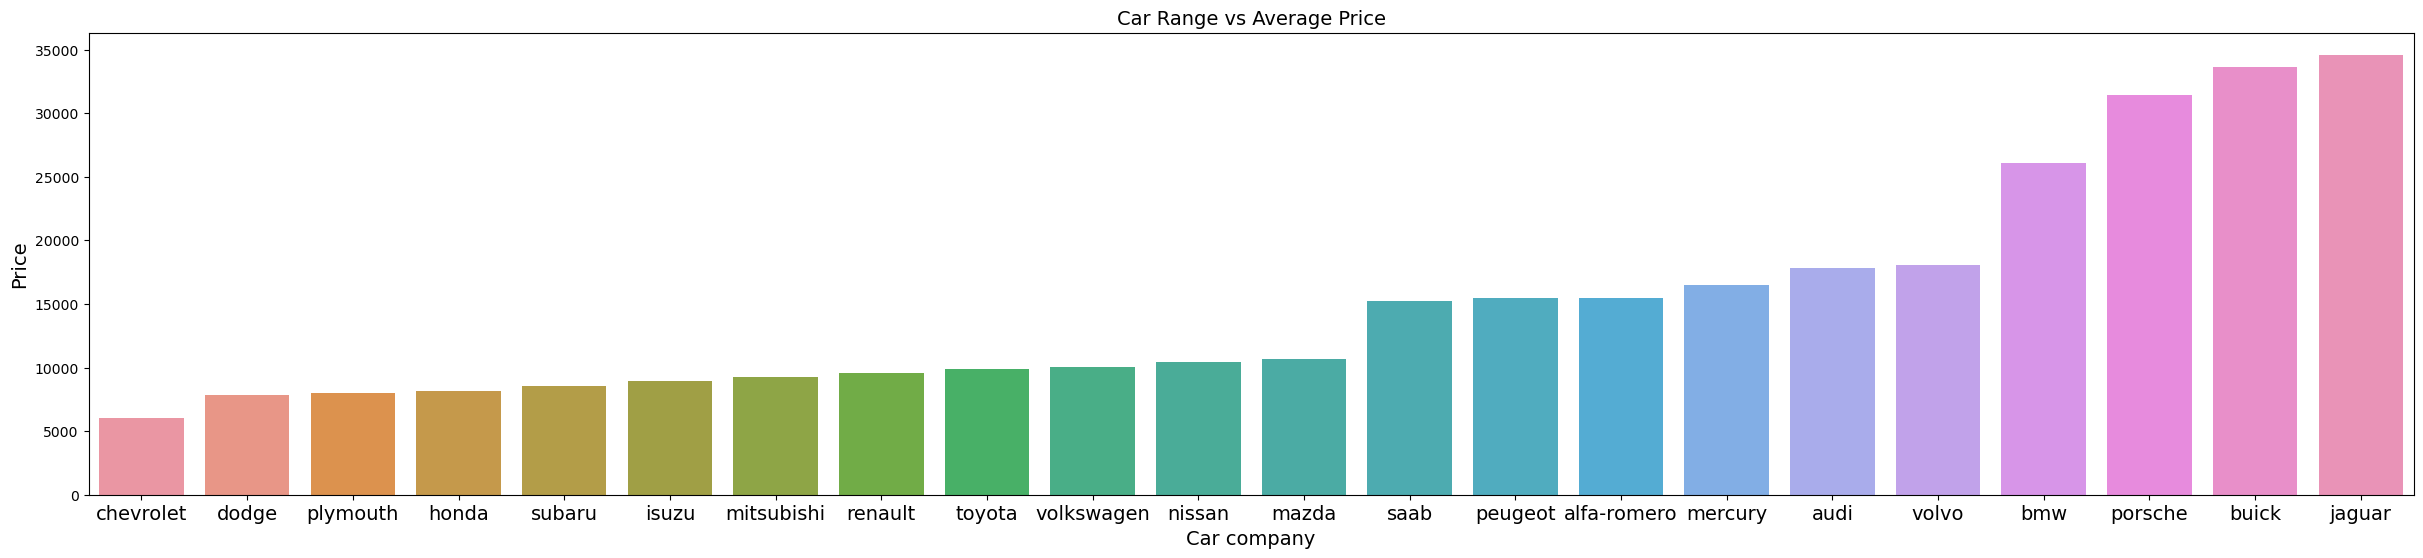

In [10]:
# check popularity of the company 
plt.figure(figsize=(30, 6))

df = pd.DataFrame(automobile.groupby(['companyname'])['price'].mean().sort_values())
df=df.reset_index(drop=False)
plt1=sns.barplot(x="companyname", y="price", data=df)
plt1.set_title('Car Range vs Average Price', size=14)
plt1.set_xlabel('Car company', fontsize=14)
plt1.set_ylabel('Price', fontsize=14)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=360, size=14)
plt.show()


#### Inference
1. Chevrolet has the cheapest average price amongst all companies.
2. Jaguar has the highest average price.
3. The avg price seems to be dependant on the company name and this is an indicator that we can use this variable in our model because it shows correlation with car price

Now, since the number of companies are too many and it would create a lot of dummy variables, lets divide these companies into segments based on their avg price.


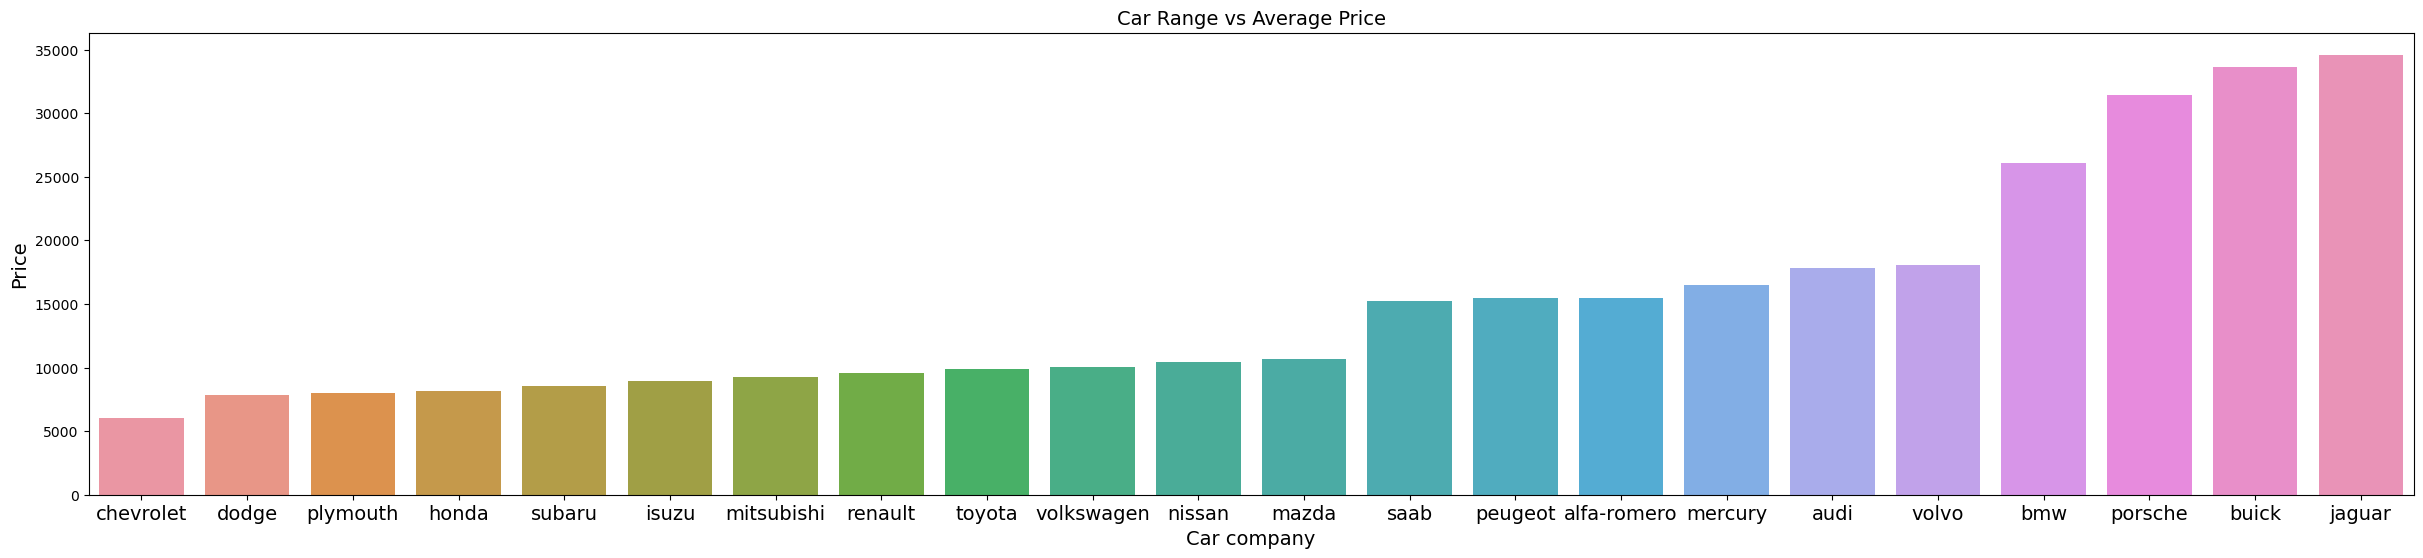

In [11]:
#plotting company wise average price of car

plt.figure(figsize=(30, 6))

df = pd.DataFrame(automobile.groupby(['companyname'])['price'].mean().sort_values())
df=df.reset_index(drop=False)
plt1=sns.barplot(x="companyname", y="price", data=df)
plt1.set_title('Car Range vs Average Price', size=14)
plt1.set_xlabel('Car company', fontsize=14)
plt1.set_ylabel('Price', fontsize=14)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=360, size=14)
plt.show()

In [12]:
def replace_values(a,b):
    automobile.companyname.replace(a,b,inplace=True)

replace_values('chevrolet','Low_End')
replace_values('dodge','Low_End')
replace_values('plymouth','Low_End')
replace_values('honda','Low_End')
replace_values('subaru','Low_End')
replace_values('isuzu','Low_End')
replace_values('mitsubishi','Budget')
replace_values('renault','Budget')
replace_values('toyota','Budget')
replace_values('volkswagen','Budget')
replace_values('nissan','Budget')
replace_values('mazda','Budget')
replace_values('saab','Medium')
replace_values('peugeot','Medium')
replace_values('alfa-romero','Medium')
replace_values('mercury','Medium')
replace_values('audi','Medium')
replace_values('volvo','Medium')
replace_values('bmw','High_End')
replace_values('porsche','High_End')
replace_values('buick','High_End')
replace_values('jaguar','High_End')

automobile.rename(columns = {'companyname':'segment'}, inplace = True)
automobile.head()


,car_ID,symboling,segment,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,Medium,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,Medium,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,Medium,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,Medium,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,Medium,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


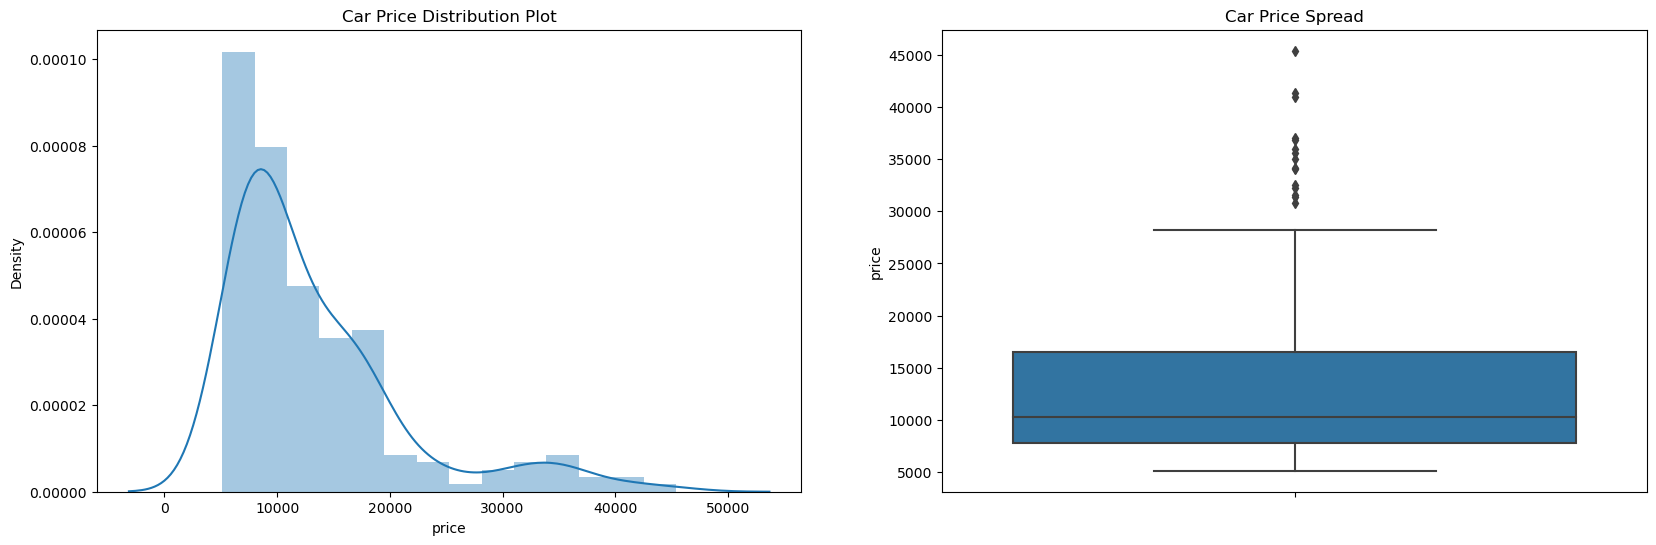

In [13]:
#checking distribution and spread of car price

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(automobile.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=automobile.price)

plt.show()

1. The plot is right-skewed, meaning that the most prices in the dataset are low (Below 15,000).
2. There is a significant difference between the mean and the median of the price distribution.
3. There is a high variance in the car prices, data points are far spread out from the mean.



In [14]:
# checking numeric columns

automobile.select_dtypes(include=['float64','int64']).columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

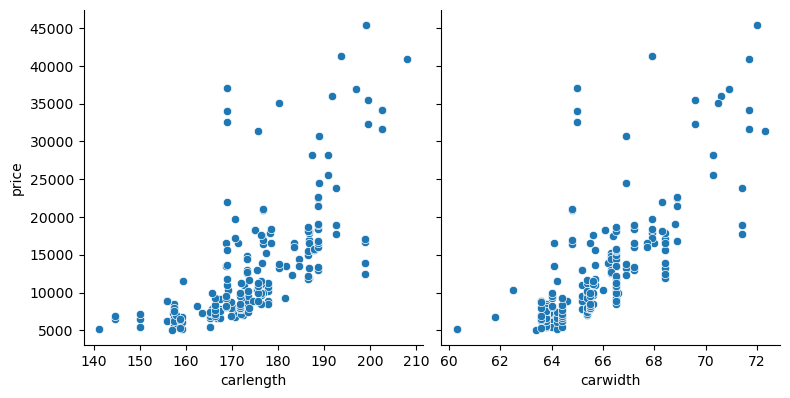

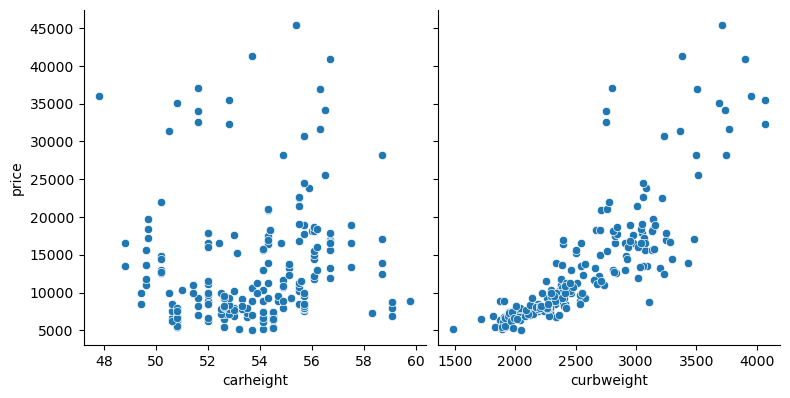

In [15]:
#function to plot scatter plot numeric variables with price

def pp(x,y):
    sns.pairplot(automobile, x_vars=[x,y], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp('carlength', 'carwidth')
pp('carheight', 'curbweight')




1. Except Car Height, all variables show a positive correlation with respect to price.

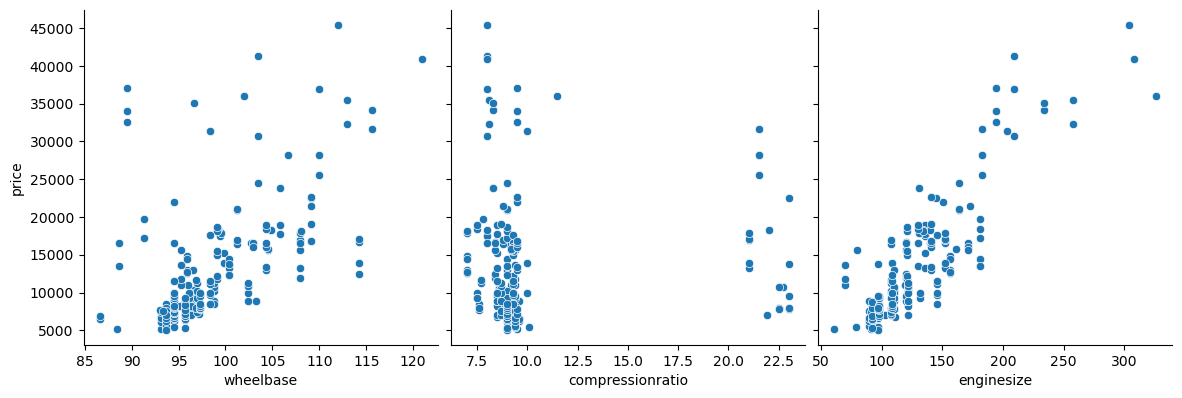

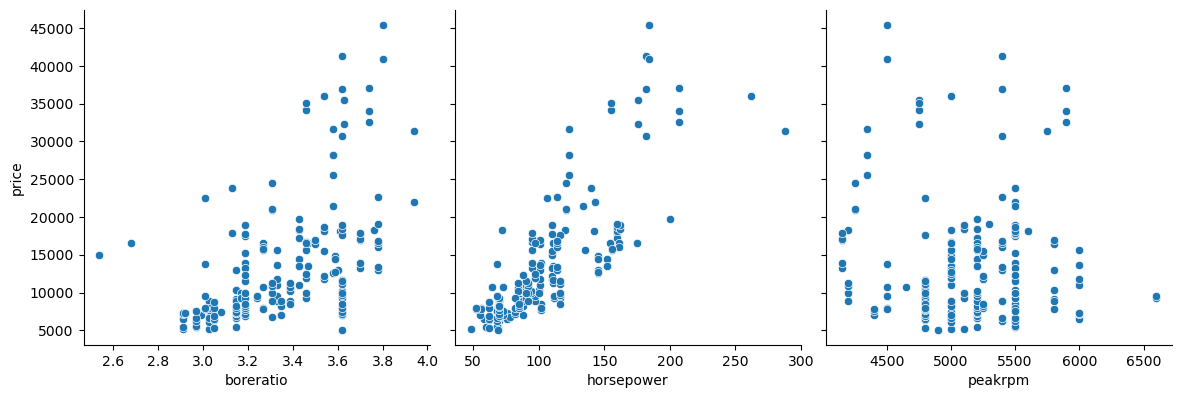

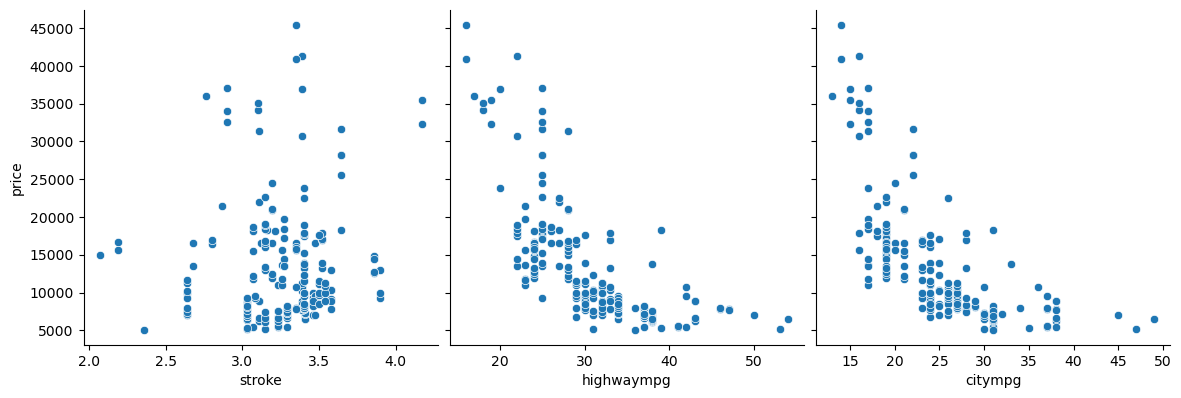

In [16]:
#function to plot scatter plot numeric variables with price

def pp(x,y,z):
    sns.pairplot(automobile, x_vars=[x,y,z], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp('wheelbase', 'compressionratio', 'enginesize')
pp('boreratio', 'horsepower', 'peakrpm')
pp('stroke', 'highwaympg', 'citympg')

1. Compression Ratio, Stoke and Peakrpm show no obvious correlation b/w them and car price.
2. Boreratio shows some positive correlation with a lot of variance.
3. Citympg and highwaympg are negatively correlated to the price.

In [17]:
#converting cylinder number to numeric and replacing values

def replace_values(a,b):
    automobile.cylindernumber.replace(a,b,inplace=True)

replace_values('four','4')
replace_values('six','6')
replace_values('five','5')
replace_values('three','3')
replace_values('twelve','12')
replace_values('two','2')
replace_values('eight','8')

automobile.cylindernumber=automobile.cylindernumber.astype('int')

In [18]:
automobile.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [19]:
#converting symboling to categorical because the numeric values imply weight

def replace_values(a,b):
    automobile.symboling.replace(a,b,inplace=True)

replace_values(3,'Very_Risky')
replace_values(2,'Moderately_Risky')
replace_values(1,'Neutral')
replace_values(0,'Safe')
replace_values(-1,'Moderately_Safe')
replace_values(-2,'Very_Safe')

In [20]:
# Converting variables with 2 values to 1 and 0

automobile['fueltype'] = automobile['fueltype'].map({'gas': 1, 'diesel': 0})
automobile['aspiration'] = automobile['aspiration'].map({'std': 1, 'turbo': 0})
automobile['doornumber'] = automobile['doornumber'].map({'two': 1, 'four': 0})
automobile['enginelocation'] = automobile['enginelocation'].map({'front': 1, 'rear': 0})

In [21]:
automobile.head()

,car_ID,symboling,segment,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,Very_Risky,Medium,1,1,1,convertible,rwd,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,Very_Risky,Medium,1,1,1,convertible,rwd,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,Neutral,Medium,1,1,1,hatchback,rwd,1,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,Moderately_Risky,Medium,1,1,0,sedan,fwd,1,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,Moderately_Risky,Medium,1,1,0,sedan,4wd,1,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [22]:
#dropping card_Id because it has all unique values

automobile.drop(['car_ID'], axis =1, inplace = True)

In [23]:
num_vars=automobile.select_dtypes(include=['float64','int64']).columns

In [24]:
automobile.fueltype.describe()

count    205.000000
mean       0.902439
std        0.297446
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: fueltype, dtype: float64

<Axes: >

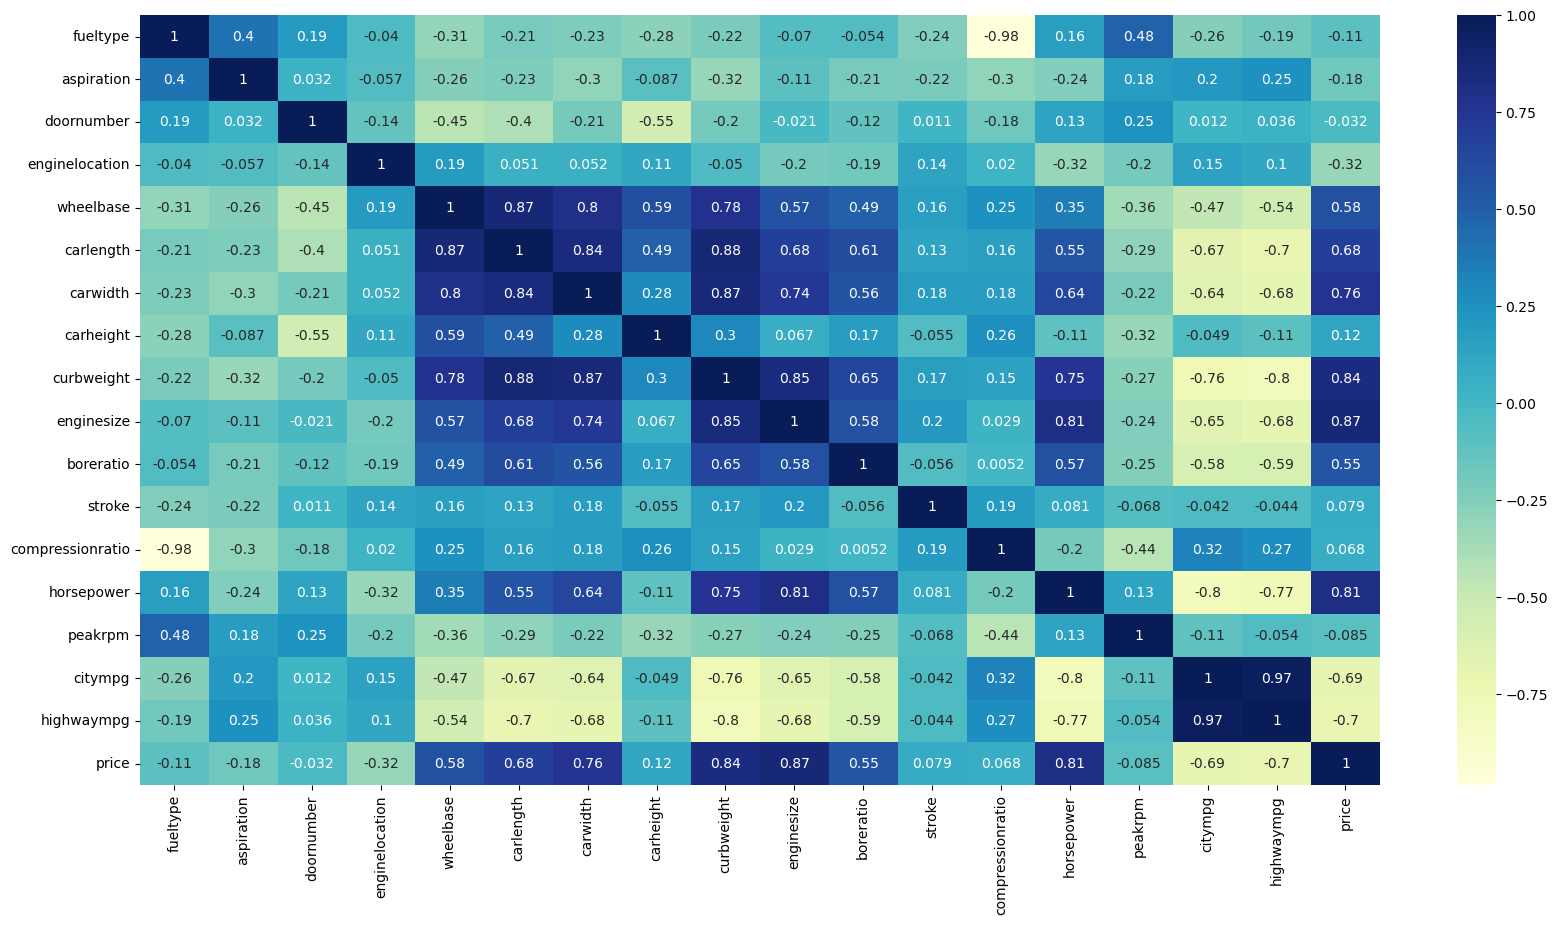

In [25]:
# plotting heatmap to check correlation amongst variables

plt.figure(figsize = (20,10))  
sns.heatmap(automobile[num_vars].corr(),cmap="YlGnBu",annot = True)

In [26]:
#dropping variables which are highly correlated to other variables

automobile.drop(['compressionratio','carwidth','curbweight','wheelbase','citympg'], axis =1, inplace = True)

In [27]:
automobile.head()

,symboling,segment,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,horsepower,peakrpm,highwaympg,price
0,Very_Risky,Medium,1,1,1,convertible,rwd,1,168.8,48.8,dohc,4,130,mpfi,3.47,2.68,111,5000,27,13495.0
1,Very_Risky,Medium,1,1,1,convertible,rwd,1,168.8,48.8,dohc,4,130,mpfi,3.47,2.68,111,5000,27,16500.0
2,Neutral,Medium,1,1,1,hatchback,rwd,1,171.2,52.4,ohcv,6,152,mpfi,2.68,3.47,154,5000,26,16500.0
3,Moderately_Risky,Medium,1,1,0,sedan,fwd,1,176.6,54.3,ohc,4,109,mpfi,3.19,3.40,102,5500,30,13950.0
4,Moderately_Risky,Medium,1,1,0,sedan,4wd,1,176.6,54.3,ohc,5,136,mpfi,3.19,3.40,115,5500,22,17450.0


In [28]:
#getting dummies for categorical variables

df = pd.get_dummies(automobile)
df.head()

,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,cylindernumber,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,1,1,1,168.8,48.8,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,1,1,1,1,168.8,48.8,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,171.2,52.4,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,1,1,0,1,176.6,54.3,4,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,1,176.6,54.3,5,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [29]:
#checking column names for dummy variables

df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'carlength',
       'carheight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'peakrpm', 'highwaympg', 'price',
       'symboling_Moderately_Risky', 'symboling_Moderately_Safe',
       'symboling_Neutral', 'symboling_Safe', 'symboling_Very_Risky',
       'symboling_Very_Safe', 'segment_Budget', 'segment_High_End',
       'segment_Low_End', 'segment_Medium', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

DIVIDING INTO TRAIN AND TEST DATASET

In [31]:

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
#SCALING NUMERIC VARIABLES
scaler = MinMaxScaler()

In [34]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'enginesize','horsepower', 
            'peakrpm', 'highwaympg', 'carlength', 'carheight', 'boreratio', 'stroke', 'price']


df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,cylindernumber,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,1.0,1.0,0.0,1.0,0.426016,0.265487,4,0.139623,0.230159,0.525253,...,0,0,0,1,0,0,0,0,0,0
125,1.0,1.0,1.0,1.0,0.452033,0.212389,4,0.339623,1.000000,0.464646,...,0,0,0,0,0,0,0,1,0,0
166,1.0,1.0,1.0,1.0,0.448780,0.424779,4,0.139623,0.444444,0.449495,...,0,0,0,0,0,0,0,1,0,0
1,1.0,1.0,1.0,1.0,0.450407,0.088496,4,0.260377,0.626984,0.247475,...,0,0,0,0,0,0,0,1,0,0
199,1.0,0.0,0.0,1.0,0.775610,0.858407,4,0.260377,0.746032,0.484848,...,0,0,0,0,0,0,0,1,0,0


### Dividing into X and Y sets for the model building

In [35]:
y_train = df_train.pop('price')
X_train = df_train

In [51]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [53]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 29),
 ('aspiration', True, 1),
 ('doornumber', False, 22),
 ('enginelocation', True, 1),
 ('carlength', True, 1),
 ('carheight', False, 13),
 ('cylindernumber', False, 10),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 8),
 ('horsepower', True, 1),
 ('peakrpm', False, 5),
 ('highwaympg', False, 2),
 ('symboling_Moderately_Risky', False, 25),
 ('symboling_Moderately_Safe', False, 16),
 ('symboling_Neutral', False, 27),
 ('symboling_Safe', False, 26),
 ('symboling_Very_Risky', False, 24),
 ('symboling_Very_Safe', False, 6),
 ('segment_Budget', False, 3),
 ('segment_High_End', True, 1),
 ('segment_Low_End', False, 4),
 ('segment_Medium', False, 33),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 19),
 ('carbody_hatchback', False, 23),
 ('carbody_sedan', False, 20),
 ('carbody_wagon', False, 17),
 ('drivewheel_4wd', False, 34),
 ('drivewheel_fwd', False, 15),
 ('drivewheel_rwd', False, 21),
 ('enginetype_dohc', False, 11),
 ('eng

In [54]:
#checking RFE columns
col = X_train.columns[rfe.support_]
col

Index(['aspiration', 'enginelocation', 'carlength', 'enginesize', 'boreratio',
       'horsepower', 'segment_High_End', 'carbody_convertible',
       'enginetype_rotor', 'fuelsystem_spdi'],
      dtype='object')

### Building model using statsmodel, for the detailed statistic

In [55]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [56]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [57]:
#function for checking VIF

def checkVIF(X):
    vif = pd.DataFrame()
    vif['variable'] = X.columns    
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [58]:
# building MODEL #1

lm = sm.OLS(y_train,X_train_rfe).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     167.3
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           7.38e-70
Time:                        15:37:47   Log-Likelihood:                 203.94
No. Observations:                 143   AIC:                            -385.9
Df Residuals:                     132   BIC:                            -353.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1915    

In [59]:
#dropping constant to calculate VIF

X_train_rfe.drop('const', axis = 1, inplace=True)

In [60]:
checkVIF(X_train_rfe)

,variable,VIF
3,enginesize,25.34
2,carlength,22.51
1,enginelocation,20.55
4,boreratio,11.74
5,horsepower,11.41
0,aspiration,7.39
6,segment_High_End,2.35
9,fuelsystem_spdi,1.40
8,enginetype_rotor,1.37
7,carbody_convertible,1.10


In [61]:
#dopping boreratio because it has the highest p-value and also high VIF. It is also something which is difficult to explain to management

X_train_new = X_train_rfe.drop(["boreratio"], axis = 1)

In [62]:
#building MODEL #2 after dropping boreratio

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     176.2
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           2.20e-69
Time:                        15:41:21   Log-Likelihood:                 199.91
No. Observations:                 143   AIC:                            -379.8
Df Residuals:                     133   BIC:                            -350.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1483    

In [63]:
X_train_new.drop('const', axis=1, inplace=True)

In [64]:
checkVIF(X_train_new)

,variable,VIF
3,enginesize,25.33
1,enginelocation,19.63
2,carlength,18.92
4,horsepower,11.11
0,aspiration,7.39
5,segment_High_End,2.34
8,fuelsystem_spdi,1.40
7,enginetype_rotor,1.37
6,carbody_convertible,1.09


In [65]:
#dopping enginelocation because it has the highest p-value and also high VIF. it has very few values for rear as we saw earlier

X_train_new.drop(["enginelocation"], axis=1, inplace=True)

In [66]:
#building MODEL #3 after dropping enginelocation

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     188.3
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           5.53e-69
Time:                        15:42:58   Log-Likelihood:                 196.05
No. Observations:                 143   AIC:                            -374.1
Df Residuals:                     134   BIC:                            -347.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0284    

In [67]:
#dropping constant to calculate VIF

X_train_new.drop('const', axis=1, inplace=True)

In [68]:
#checking VIF

checkVIF(X_train_new)

,variable,VIF
2,enginesize,25.01
1,carlength,11.10
3,horsepower,11.03
0,aspiration,3.25
4,segment_High_End,2.25
6,enginetype_rotor,1.37
7,fuelsystem_spdi,1.15
5,carbody_convertible,1.08


In [69]:
#dopping horsepower because it has the high VIF and exhibits multicollinearity. 
#it is highly correlated to engine size and can be dropped.

X_train_new.drop(["horsepower"], axis=1, inplace=True)

In [70]:
#building MODEL #4 after dropping horsepower

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     181.0
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           2.32e-65
Time:                        15:44:00   Log-Likelihood:                 184.28
No. Observations:                 143   AIC:                            -352.6
Df Residuals:                     135   BIC:                            -328.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0081    

In [71]:
#dropping constant to calculate VIF

X_train_new.drop('const', axis=1, inplace=True)

In [72]:
#checking VIF

checkVIF(X_train_new)

,variable,VIF
2,enginesize,12.81
1,carlength,11.07
0,aspiration,3.19
3,segment_High_End,2.24
5,enginetype_rotor,1.13
6,fuelsystem_spdi,1.11
4,carbody_convertible,1.08


In [73]:
#dopping carlength because it has the high VIF and exhibits multicollinearity. 
#it is highly correlated to engine size and can be dropped.

X_train_new.drop(["carlength"], axis=1, inplace=True)

In [74]:
#building MODEL #5 after dropping carlength

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     178.0
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           7.44e-62
Time:                        15:44:58   Log-Likelihood:                 172.89
No. Observations:                 143   AIC:                            -331.8
Df Residuals:                     136   BIC:                            -311.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0718    

In [75]:
#dropping constant to calculate VIF

X_train_vif=X_train_new.drop('const', axis=1)

In [76]:
checkVIF(X_train_vif)

,variable,VIF
1,enginesize,4.18
0,aspiration,2.72
2,segment_High_End,1.94
5,fuelsystem_spdi,1.11
4,enginetype_rotor,1.07
3,carbody_convertible,1.05


## Residual Analysis of the train data

In [77]:
#calculating price on train set using the model built

y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

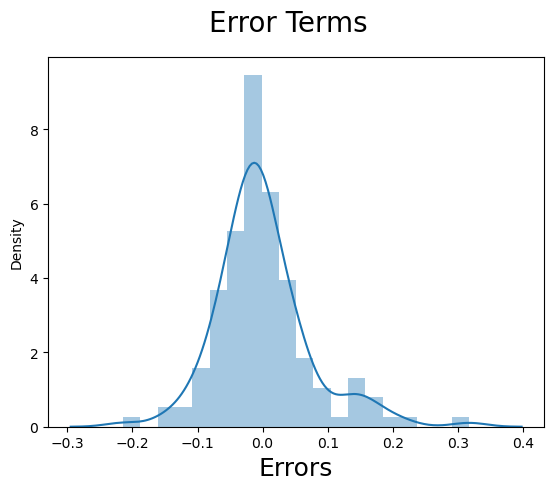

In [78]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

Error Terms are normally distributed with mean 0



Text(0, 0.5, 'y_train_price')

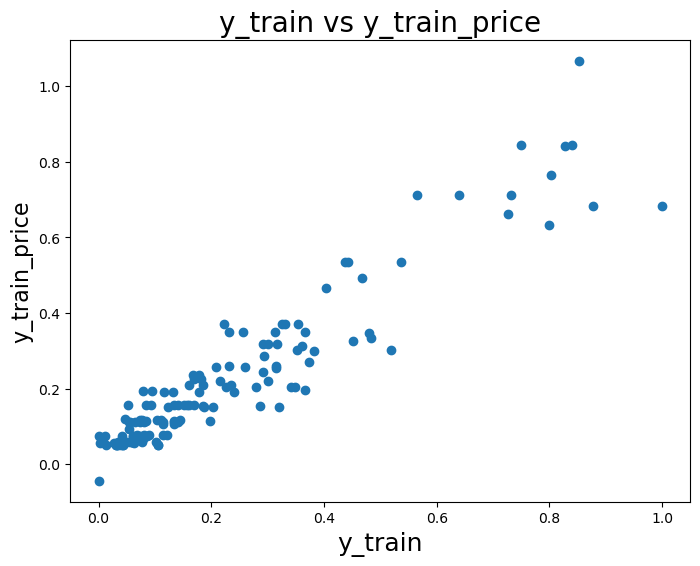

In [79]:
# Plotting y_train and y_train_price to understand the residuals.

plt.figure(figsize = (8,6))
plt.scatter(y_train,y_train_price)
plt.title('y_train vs y_train_price', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_price', fontsize=16)

## Making Predictions

In [80]:
# Applying the scaling on the test sets

num_vars = ['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'enginesize','horsepower', 
            'peakrpm', 'highwaympg', 'carlength', 'carheight', 'boreratio', 'stroke', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [81]:
# Dividing into X_test and y_test

y_test = df_test.pop('price')
X_test = df_test

In [82]:
X_train_new.drop('const', axis=1, inplace=True)

In [83]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [84]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [86]:
r2_score(y_test, y_pred)

0.8772766234421763

## Model Evaluation

Text(0, 0.5, 'y_pred')

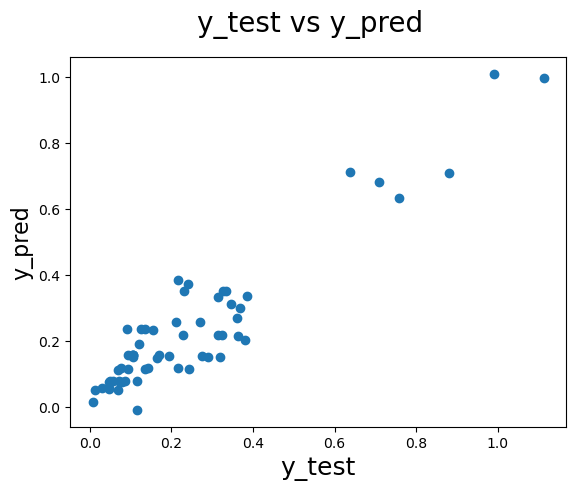

In [87]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'ytest-ypred')

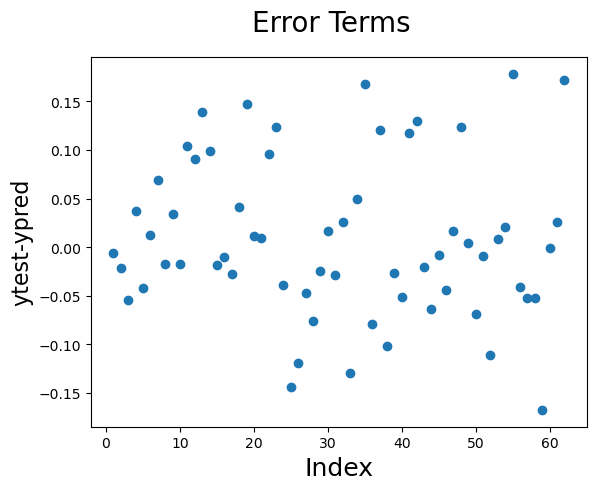

In [88]:
# Error terms

fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.scatter(c,y_test-y_pred)

fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [89]:
#RMSE score for test set

import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.08098980094102316


In [90]:
#RMSE score for train set

import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_price)))

RMSE : 0.07222658461747392


In [93]:
r2_score(y_test, y_pred)

0.8772766234421763

In [94]:
r2_score(y_train, y_train_price)

0.8870686436956071